# Cleaning Data With Pandas
Materi ke-6 Course Introduction Python for Data Science

In [133]:
import pandas as pd
import requests
import numpy as np

In [139]:
pip --version

pip 22.0.4 from C:\Users\Asus-X550Z\AppData\Roaming\Python\Python39\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [3]:
download_url = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv'

In [4]:
response=requests.get(download_url)

In [4]:
print(type(response.status_code))
print(response.status_code)
if 200 >= response.status_code <400 :
    print('success')
else :
    print('error')

<class 'int'>
200
success


In [5]:
with open('property_data.csv','wb') as f:
    f.write(response.content)

In [6]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 720B-E28B

 Directory of C:\Users\Asus-X550Z

09/03/2022  18:11    <DIR>          .
09/03/2022  18:11    <DIR>          ..
20/02/2022  20:55               368 .bash_history
16/02/2022  23:14    <DIR>          .conda
14/02/2022  12:37                25 .condarc
14/02/2022  12:36    <DIR>          .continuum
19/02/2022  18:58                53 .git-for-windows-updater
18/02/2022  15:59                53 .gitconfig
05/03/2021  17:23    <DIR>          .gstreamer-0.10
08/02/2022  09:02    <DIR>          .idlerc
09/03/2022  16:47    <DIR>          .ipynb_checkpoints
14/02/2022  10:57    <DIR>          .ipython
17/02/2022  18:59    <DIR>          .jupyter
20/02/2022  11:02                20 .lesshst
03/06/2021  19:26    <DIR>          .maplesoft
17/02/2022  19:15    <DIR>          .matplotlib
04/03/2022  14:09                 5 .python_history
20/10/2021  15:55    <DIR>          .spss
08/02/2022  09:09    <DIR>          .vscode
06/12/2

In [5]:
df=pd.read_csv('property_data.csv')

In [6]:
len(df)

9

In [9]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


## standart missing value 

In [10]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [11]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

## non standart missing value

In [13]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [14]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [15]:
missing_values=["n/a","na","--"]

In [16]:
df=pd.read_csv('property_data.csv',na_values=missing_values)

In [17]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [18]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

## unexpected missing values

In [19]:
df["OWN_OCCUPIED"]

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [20]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [34]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt,'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1
        

In [35]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,OWN OCCUPIED
0,100001000.0,104.0,PUTNAM,NaN,3.0,1,1000.0,NaN
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0,NaN
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0,NaN
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0,NaN


In [36]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    3
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
OWN OCCUPIED    9
dtype: int64

In [37]:
hapus_colom=['OWN OCCUPIED']

In [38]:
df.drop(hapus_colom,inplace=True,axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  6 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [40]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,NaN,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [41]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    3
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [42]:
df.isnull().values.any()

True

In [43]:
df.isnull().sum().sum()

13

## replacing

In [ ]:
df['ST_NUM'].fillna(125, inplace=True)

In [47]:
df.loc[2,'ST_NUM']=125

In [48]:
median=df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median,inplace=True)

In [49]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,NaN,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## Analyzing Obesity In England

In [7]:
%matplotlib inline
data=pd.ExcelFile('obes.xls')

In [8]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [9]:
data_age=data.parse(u'7.2',skiprows=4, skipfooter=14)

In [10]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [18]:
data_age.rename(columns={u'Unnamed: 0' : u'Year'}, inplace=True)

In [19]:
data_age.dropna(inplace=True)

In [20]:
data_age.set_index('Year',inplace=True)

In [21]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<AxesSubplot:xlabel='Year'>

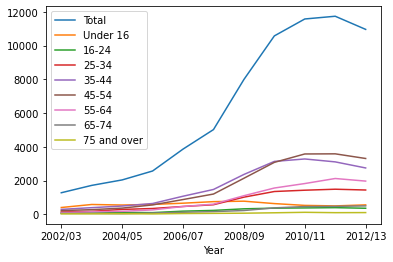

In [22]:
data_age.plot()

In [23]:
data_age_minus_total=data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

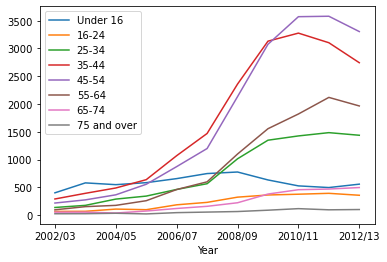

In [24]:
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

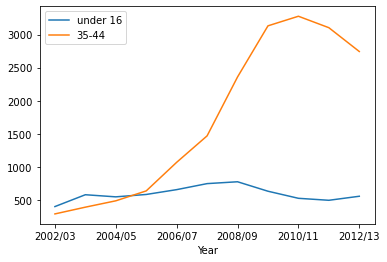

In [25]:
data_age['Under 16'].plot(label='under 16', legend=True)
data_age['35-44'].plot(label='35-44',legend=True)

## Time Series

### basic time series manipulation

In [26]:
from datetime import datetime

In [27]:
date_rng=pd.date_range(start='1/01/2020', end='1/08/2020',freq='H')

In [28]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [29]:
df=pd.DataFrame(date_rng, columns=['Date'])

In [30]:
df['data']=np.random.randint(0,100,size=(len(date_rng)))

In [31]:
df.head()

,Date,data
0,2020-01-01 00:00:00,8
1,2020-01-01 01:00:00,21
2,2020-01-01 02:00:00,66
3,2020-01-01 03:00:00,29
4,2020-01-01 04:00:00,43


In [32]:
df['datetime']=pd.to_datetime(df['Date'])

In [33]:
df=df.set_index('datetime')

In [34]:
df.drop(['Date'], axis=1, inplace=True)

In [35]:
df.head()

,data
datetime,
2020-01-01 00:00:00,8
2020-01-01 01:00:00,21
2020-01-01 02:00:00,66
2020-01-01 03:00:00,29
2020-01-01 04:00:00,43


In [36]:
## mengubah time stamps dalam data berjenis string menjadi stempel waktu

In [38]:
string_date_rng=[str(x) for x in date_rng]

In [39]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [ ]:
#mengkonversi string menjadi timestamp denan melihat format lalu melihat nilainya

In [40]:
timestamp_date_rng=pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [42]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [43]:
# bagaimana jika kita perlu menguah format unique stirng?
# kita buat daftar tanggal yang berubah ubah menjadi string dan menjadikannya timestampe

In [44]:
string_date_rng_2=['June-01-2020', 'June-02-2020', 'June-03-2020']

In [48]:
timestamp_date_rng2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]

In [49]:
timestamp_date_rng2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [51]:
df2=pd.DataFrame(timestamp_date_rng2, columns=['date'])

In [52]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [53]:
df[df.index.day==2]

,data
datetime,
2020-01-02 00:00:00,69
2020-01-02 01:00:00,19
2020-01-02 02:00:00,89
2020-01-02 03:00:00,50
2020-01-02 04:00:00,16
2020-01-02 05:00:00,39
2020-01-02 06:00:00,63
2020-01-02 07:00:00,21
2020-01-02 08:00:00,94


In [54]:
df['2020-01-03']

C:\Users\ASUS-X~1\AppData\Local\Temp/ipykernel_9340/186698106.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,37
2020-01-03 01:00:00,80
2020-01-03 02:00:00,22
2020-01-03 03:00:00,69
2020-01-03 04:00:00,46
2020-01-03 05:00:00,42
2020-01-03 06:00:00,70
2020-01-03 07:00:00,5
2020-01-03 08:00:00,87


In [55]:
df['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,88
2020-01-04 01:00:00,45
2020-01-04 02:00:00,53
2020-01-04 03:00:00,90
2020-01-04 04:00:00,47
...,...
2020-01-06 19:00:00,42
2020-01-06 20:00:00,0
2020-01-06 21:00:00,14


In [56]:
df.resample('D').mean()

,data
datetime,
2020-01-01,46.375000
2020-01-02,43.166667
2020-01-03,53.791667
2020-01-04,46.875000
2020-01-05,50.125000
2020-01-06,45.666667
2020-01-07,43.166667
2020-01-08,96.000000


In [57]:
df['rolling_sum']=df.rolling(3).sum()

In [58]:
df.head(
)

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,8,NaN
2020-01-01 01:00:00,21,NaN
2020-01-01 02:00:00,66,95.0
2020-01-01 03:00:00,29,116.0
2020-01-01 04:00:00,43,138.0


In [59]:
df['rolling_sum_backfilled']=df['rolling_sum'].fillna(method='backfill')

In [60]:
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,8,NaN,95.0
2020-01-01 01:00:00,21,NaN,95.0
2020-01-01 02:00:00,66,95.0,95.0
2020-01-01 03:00:00,29,116.0,116.0
2020-01-01 04:00:00,43,138.0,138.0


### Timeseries on dataset

In [61]:
download_url_2='https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv'

In [62]:
response=requests.get(download_url_2)

In [63]:
with open('time_use_energy.csv','wb') as f:
    f.write(response.content)

In [64]:
print(type(response.status_code))
print(response.status_code)
if 200 >= response.status_code <400 :
    print('success')
else :
    print('error')

<class 'int'>
200
success


In [65]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 720B-E28B

 Directory of C:\Users\Asus-X550Z

11/03/2022  10:24    <DIR>          .
11/03/2022  10:24    <DIR>          ..
20/02/2022  20:55               368 .bash_history
16/02/2022  23:14    <DIR>          .conda
14/02/2022  12:37                25 .condarc
14/02/2022  12:36    <DIR>          .continuum
19/02/2022  18:58                53 .git-for-windows-updater
18/02/2022  15:59                53 .gitconfig
05/03/2021  17:23    <DIR>          .gstreamer-0.10
08/02/2022  09:02    <DIR>          .idlerc
09/03/2022  16:47    <DIR>          .ipynb_checkpoints
14/02/2022  10:57    <DIR>          .ipython
17/02/2022  18:59    <DIR>          .jupyter
20/02/2022  11:02                20 .lesshst
03/06/2021  19:26    <DIR>          .maplesoft
17/02/2022  19:15    <DIR>          .matplotlib
04/03/2022  14:09                 5 .python_history
20/10/2021  15:55    <DIR>          .spss
08/02/2022  09:09    <DIR>          .vscode
06/12/2

In [92]:
opsd_daily=pd.read_csv('time_use_energy.csv', parse_dates=True, index_col=0)

In [95]:
opsd_daily.shape

(4383, 4)

In [96]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [98]:

opsd_daily.head(4)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN


In [99]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [100]:
opsd_daily['Year']=opsd_daily.index.year
opsd_daily['Month']=opsd_daily.index.month
opsd_daily['Weekday']=opsd_daily.index.weekday

In [101]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [103]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


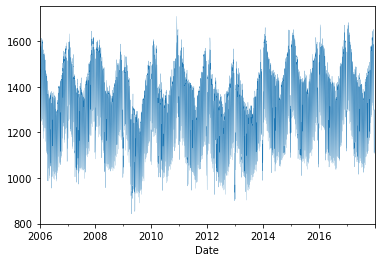

In [108]:
opsd_daily['Consumption'].plot(linewidth=0.2);

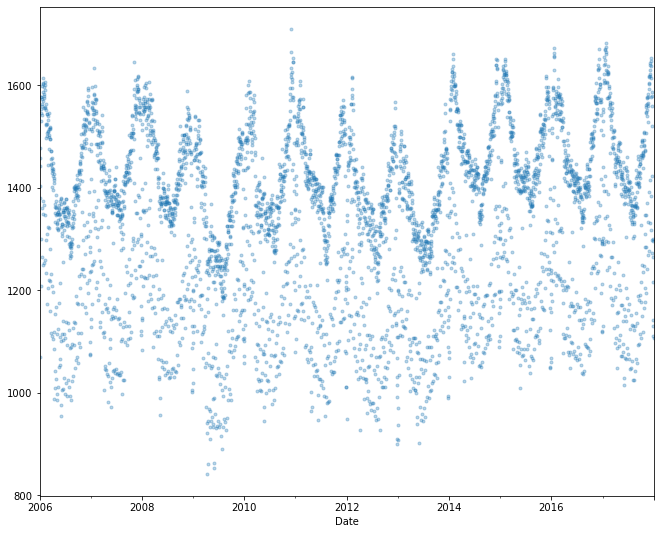

In [107]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.3, linestyle='None', figsize=(11,9));

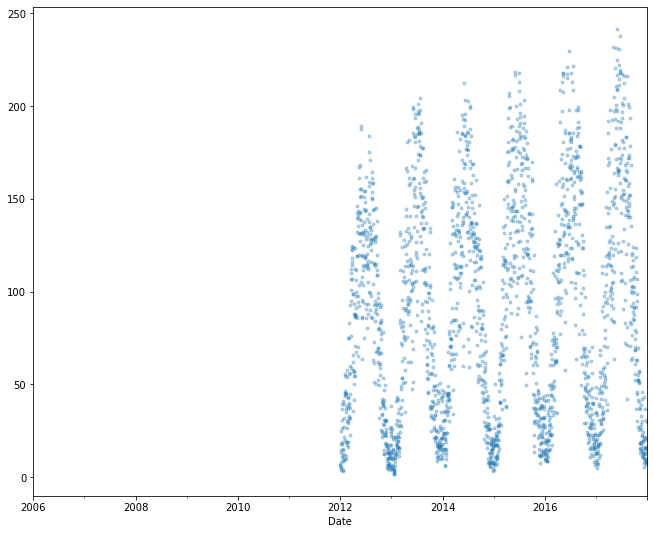

In [116]:
opsd_daily['Solar'].plot(marker='.', alpha=0.3, linestyle='None', figsize=(11,9));


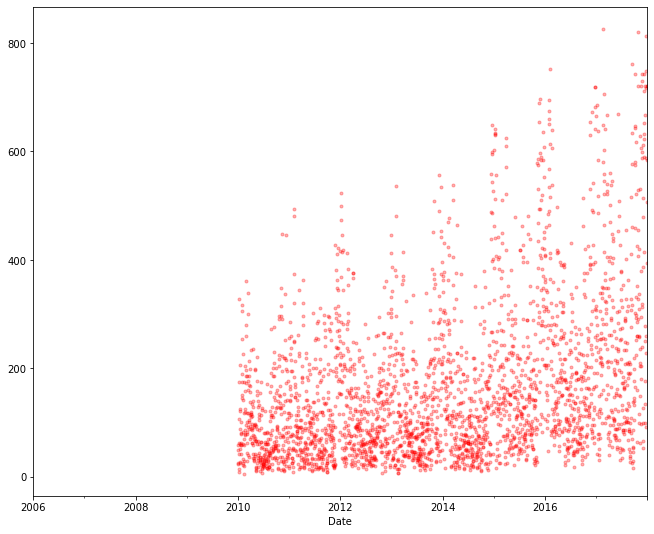

In [111]:
opsd_daily['Wind'].plot(marker='.', alpha=0.3, linestyle='None', figsize=(11,9), color='red');

Text(0, 0.5, 'Daily Consumption (GWh)')

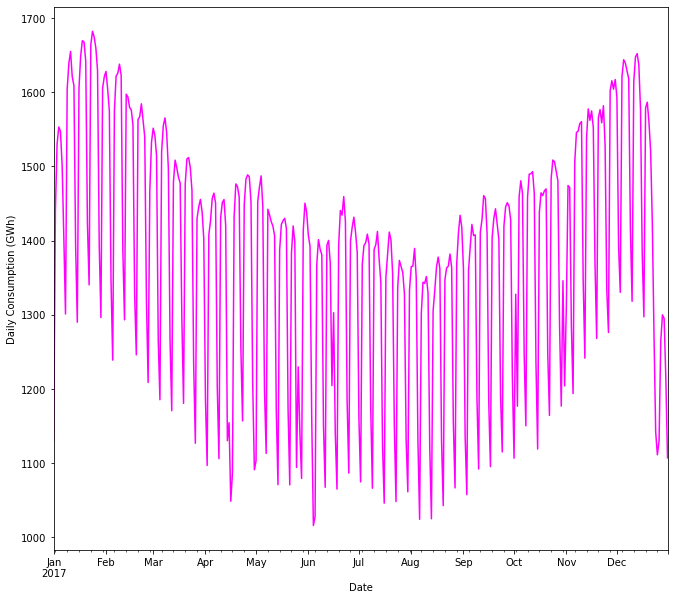

In [118]:
ax=opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,10), color='magenta')
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption GWh')

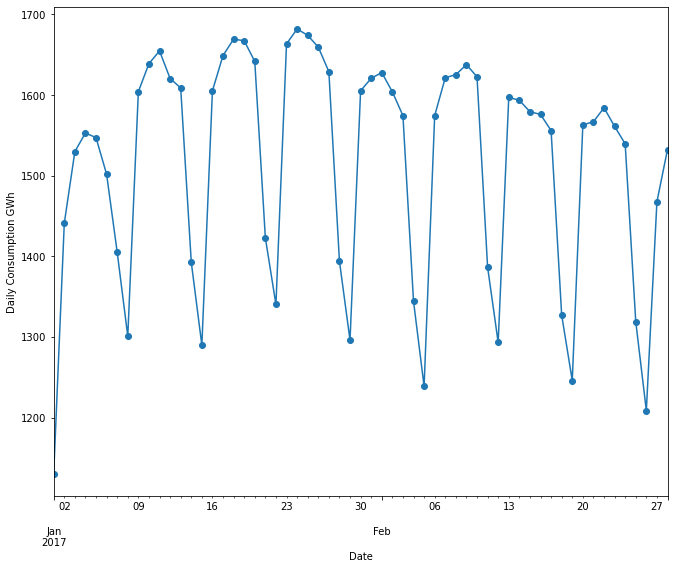

In [124]:
ax=opsd_daily.loc['2017-01':'2017-02','Consumption'].plot(marker ='o',linestyle='-',figsize=(11,9))
ax.set_ylabel('Daily Consumption GWh')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

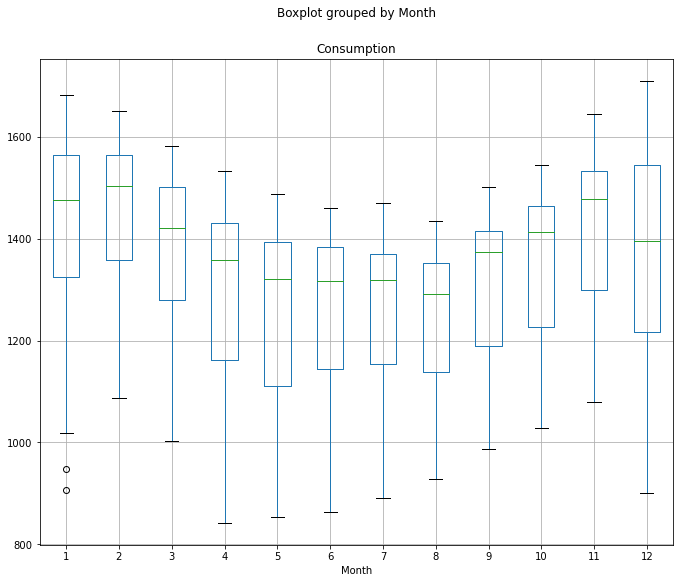

In [127]:
opsd_daily.boxplot(column=['Consumption'],by='Month', figsize=(11,9))

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

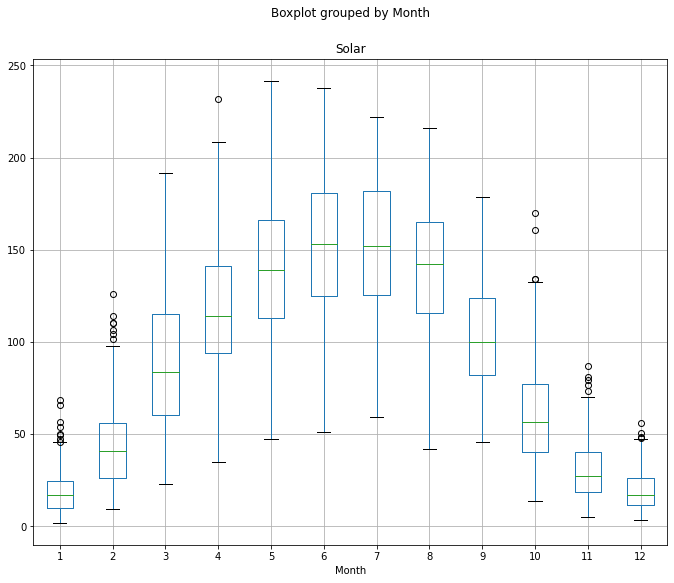

In [128]:
opsd_daily.boxplot(column=['Solar'],by='Month', figsize=(11,9))

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

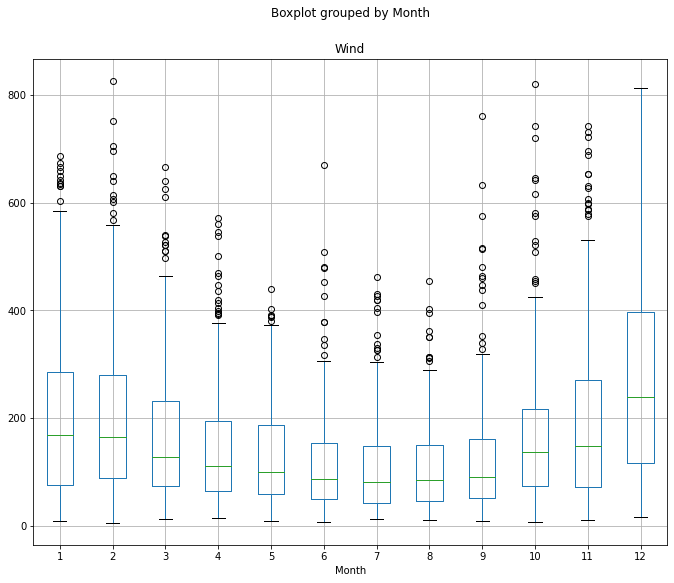

In [129]:
opsd_daily.boxplot(column=['Wind'],by='Month', figsize=(11,9))

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

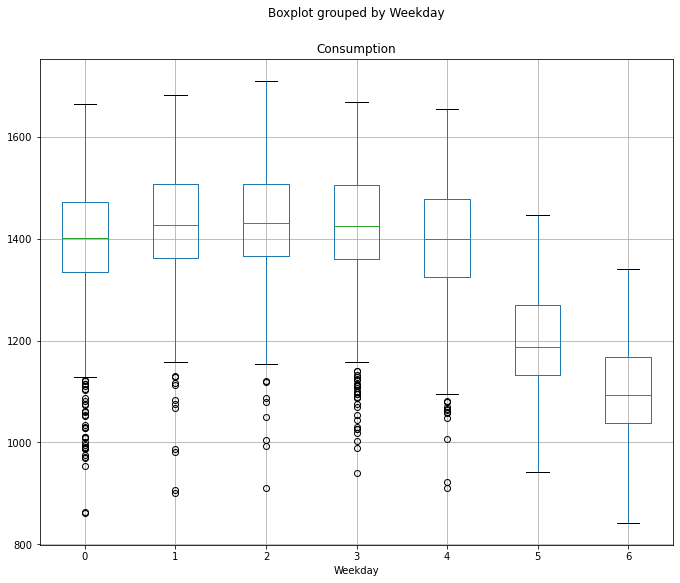

In [130]:
opsd_daily.boxplot(column=['Consumption'],by='Weekday', figsize=(11,9))

In [131]:
data_columns=['Consumption','Wind','Solar','Wind+Solar']
opsd_weekly_mean=opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

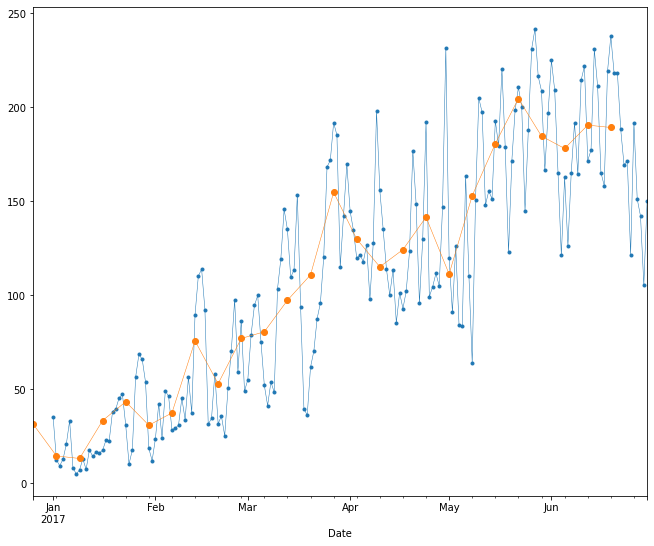

In [136]:
start='2017-01'
end='2017-06'
opsd_daily.loc[start:end,'Solar'].plot(marker='.',linestyle='-',linewidth=0.5,figsize=(11,9))
opsd_weekly_mean.loc[start:end,'Solar'].plot(marker='o',linestyle='-',linewidth=0.5,figsize=(11,9))